In [1]:
import pandas as pd,numpy as np,warnings,matplotlib.pyplot as plt,statsmodels.api as sm
import seaborn as sns,tensorflow as tf,xgboost as xg
from scipy.stats import pearsonr
from math import sqrt
from scipy import stats 
from sklearn import datasets ,svm,linear_model,metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification,make_regression,make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler as mms,RobustScaler
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras import layers
from tensorflow import keras
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\sudarson.SUDARSON\Desktop\Imarticus\13 USL PSA\PrincipalComponentAnalysis(PCA)\Principal Component Analysis (PCA)\Dataset\houseprice.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
col=data.columns
col

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
null=[]
for i in col:
    if data[i].isnull().sum() != 0:
        null.append(i)
        print(i,data[i].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [5]:
data=data.drop(["Id","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [6]:
col=data.columns
col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [7]:
null=[]
for i in col:
    if data[i].isnull().sum() != 0:
        null.append(i)
        print(i,data[i].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [8]:
for j in null:
    print("display('",j,"')"," ,display(data['"+j+"'].unique())")

display(' LotFrontage ')  ,display(data['LotFrontage'].unique())
display(' MasVnrType ')  ,display(data['MasVnrType'].unique())
display(' MasVnrArea ')  ,display(data['MasVnrArea'].unique())
display(' BsmtQual ')  ,display(data['BsmtQual'].unique())
display(' BsmtCond ')  ,display(data['BsmtCond'].unique())
display(' BsmtExposure ')  ,display(data['BsmtExposure'].unique())
display(' BsmtFinType1 ')  ,display(data['BsmtFinType1'].unique())
display(' BsmtFinType2 ')  ,display(data['BsmtFinType2'].unique())
display(' Electrical ')  ,display(data['Electrical'].unique())
display(' GarageType ')  ,display(data['GarageType'].unique())
display(' GarageYrBlt ')  ,display(data['GarageYrBlt'].unique())
display(' GarageFinish ')  ,display(data['GarageFinish'].unique())
display(' GarageQual ')  ,display(data['GarageQual'].unique())
display(' GarageCond ')  ,display(data['GarageCond'].unique())


In [9]:
display(' LotFrontage ')  ,display(data['LotFrontage'].unique())
display(' MasVnrType ')  ,display(data['MasVnrType'].unique())
display(' MasVnrArea ')  ,display(data['MasVnrArea'].unique())
display(' BsmtQual ')  ,display(data['BsmtQual'].unique())
display(' BsmtCond ')  ,display(data['BsmtCond'].unique())
display(' BsmtExposure ')  ,display(data['BsmtExposure'].unique())
display(' BsmtFinType1 ')  ,display(data['BsmtFinType1'].unique())
display(' BsmtFinType2 ')  ,display(data['BsmtFinType2'].unique())
display(' Electrical ')  ,display(data['Electrical'].unique())
display(' GarageType ')  ,display(data['GarageType'].unique())
display(' GarageYrBlt ')  ,display(data['GarageYrBlt'].unique())
display(' GarageFinish ')  ,display(data['GarageFinish'].unique())
display(' GarageQual ')  ,display(data['GarageQual'].unique())
display(' GarageCond ')  ,display(data['GarageCond'].unique())

' LotFrontage '

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

' MasVnrType '

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

' MasVnrArea '

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

' BsmtQual '

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

' BsmtCond '

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

' BsmtExposure '

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

' BsmtFinType1 '

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

' BsmtFinType2 '

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

' Electrical '

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

' GarageType '

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

' GarageYrBlt '

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

' GarageFinish '

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

' GarageQual '

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

' GarageCond '

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

(None, None)

In [10]:
data.LotFrontage.fillna(data.LotFrontage.mean(),inplace=True)
data.MasVnrType.fillna(data.MasVnrType .mode().max(),inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea .mean(),inplace=True)
data.BsmtQual.fillna(data.BsmtQual.mode().max(),inplace=True)
data.BsmtCond .fillna(data.BsmtCond.mode().max(),inplace=True)
data.BsmtExposure.fillna(data.BsmtExposure.mode().max(),inplace=True)
data.BsmtFinType1.fillna(data.BsmtFinType1.mode().max(),inplace=True)
data.BsmtFinType2.fillna(data.BsmtFinType2.mode().max(),inplace=True)
data. Electrical.fillna(data. Electrical .mode().max(),inplace=True)
data.GarageType.fillna(data.GarageType .mode().max(),inplace=True)
data.GarageYrBlt.fillna(data.GarageYrBlt. median(),inplace=True)
data.GarageFinish.fillna(data.GarageFinish .mode().max(),inplace=True)
data. GarageQual .fillna(data. GarageQual .mode().max(),inplace=True)
data.GarageCond.fillna(data.GarageCond .mode().max(),inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
num=[]
for k in col:
    if data[k].dtypes != "object":
        num.append(k)
num       

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
obj=[]
for k in col:
    if data[k].dtypes == "object":
        obj.append(k)
obj    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [14]:
x=data.drop("SalePrice",axis=1)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [15]:
y=data.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [16]:
col=x.columns

In [17]:
for i in range(0,len(col)):
    if(col[i]!='MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice'):
        x1 = LabelEncoder().fit(x[col[i]])
        x2 = x1.transform(x[col[i]])
        x2= pd.DataFrame(x2)
        x[col[i]]=x2

In [18]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)

In [19]:
linearreg= LinearRegression().fit(trainx,trainy)
linearreg.predict(testx)
linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))


In [20]:
decisionreg = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
decisionreg.predict(testx)
decisionrms=sqrt(mean_squared_error(testy,decisionreg.predict(testx),squared=False))
  

In [21]:
randomreg= RandomForestRegressor(max_depth=10, random_state=0).fit(trainx,trainy)
randomreg.predict(testx)
randomrms=sqrt(mean_squared_error(testy,randomreg.predict(testx),squared=False))
        

In [22]:
adabreg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
adabreg.predict(testx)
adabrms=sqrt(mean_squared_error(testy,adabreg.predict(testx),squared=False))
    

In [23]:
gradreg= GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
gradreg.predict(testx)
gradrms=sqrt(mean_squared_error(testy,gradreg.predict(testx),squared=False))
    

In [24]:

xgboostreg= xg.XGBRegressor(n_estimators = 10, seed = 123).fit(trainx,trainy)
xgboostreg.predict(testx)
xgboostrms=sqrt(mean_squared_error(testy,xgboostreg.predict(testx),squared=False))
    

In [25]:
print("LinearRegression          = ",linearreg.score(testx,testy))
print("Decision Tree Regressor   = ",decisionreg.score(testx,testy))
print("RandomForestRegressor     = ",randomreg.score(testx,testy))
print("AdaBoostRegressor         = ",adabreg.score(testx,testy))
print("GradientBoostingRegressor = ",gradreg.score(testx,testy))
print("XGBoostingRegressor       = ",xgboostreg.score(testx,testy))
    
print("LinearRegression          rms   = ",linearrms)
print("Decision Tree Regressor   rms   = ",decisionrms)
print("RandomForestRegressor     rms   = ",randomrms)
print("AdaBoostRegressor         rms   = ",adabrms)
print("GradientBoostingRegressor rms   = ",gradrms)
print("XGBoostingRegressor       rms   = ",xgboostrms)

LinearRegression          =  0.8487333398609761
Decision Tree Regressor   =  0.782951073859781
RandomForestRegressor     =  0.8967624099849427
AdaBoostRegressor         =  0.8119200296518396
GradientBoostingRegressor =  0.9127555688020851
XGBoostingRegressor       =  0.8780099905917623
LinearRegression          rms   =  174.4857556250119
Decision Tree Regressor   rms   =  190.9693124001503
RandomForestRegressor     rms   =  158.59286269864563
AdaBoostRegressor         rms   =  184.25098188893054
GradientBoostingRegressor rms   =  152.05776504334113
XGBoostingRegressor       rms   =  165.35039633062135


# Principle Component Analysis

In [26]:
pca=PCA().fit(x)

In [27]:
#print(pca.explained_variance_ratio_)

In [28]:
#print(pca.singular_values_)

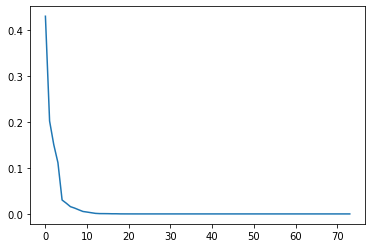

In [29]:
plt.plot(pca.explained_variance_ratio_)

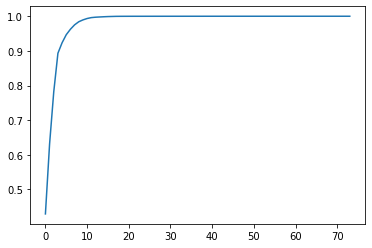

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [31]:
pca=PCA(n_components=10).fit(x)

In [32]:
cp=pca.transform(x)

In [33]:
x=pd.DataFrame(cp)

In [34]:
x

,0,1,2,3,4,5,6,7,8,9
0,-152.167709,216.638930,105.103925,352.840042,-105.039093,20.849538,18.536718,-64.843421,23.683013,0.788297
1,57.432984,324.790589,-193.682156,-80.830802,-15.008604,-64.495202,-48.353579,124.553686,-30.228364,-27.656596
2,139.596361,26.302252,299.471701,132.869667,-121.179702,32.303082,-5.893637,-66.847119,14.220470,-21.815511
3,-59.854660,-140.516780,223.222909,151.807225,1.630093,87.650266,-97.279852,-69.256790,-42.927932,-30.883218
4,550.765599,64.683625,283.205145,182.958696,-178.195246,89.656140,48.455527,12.747007,1.830862,-4.602412
...,...,...,...,...,...,...,...,...,...,...
1455,-173.311834,-370.374464,-2.942613,134.536547,-35.042891,-39.646927,-56.057230,-29.185557,0.114038,-8.686557
1456,685.501608,103.613916,-116.760338,-29.777282,133.593856,-81.885677,7.605277,119.475621,-79.347939,-30.758608
1457,169.915003,-334.320741,41.084792,324.906542,67.142908,-233.040236,-22.620782,-26.217675,68.345459,-19.426809
1458,-218.002876,185.100720,69.271760,-189.282482,218.169420,52.055757,37.002517,235.464473,217.345143,-29.434148


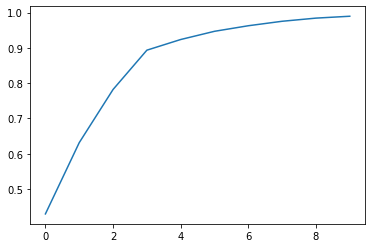

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [36]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)

In [37]:
linearreg= LinearRegression().fit(trainx,trainy)
linearreg.predict(testx)
linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))


In [38]:
decisionreg = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
decisionreg.predict(testx)
decisionrms=sqrt(mean_squared_error(testy,decisionreg.predict(testx),squared=False))
  

In [39]:
randomreg= RandomForestRegressor(max_depth=10, random_state=0).fit(trainx,trainy)
randomreg.predict(testx)
randomrms=sqrt(mean_squared_error(testy,randomreg.predict(testx),squared=False))
        

In [40]:
adabreg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
adabreg.predict(testx)
adabrms=sqrt(mean_squared_error(testy,adabreg.predict(testx),squared=False))
    

In [41]:
gradreg= GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
gradreg.predict(testx)
gradrms=sqrt(mean_squared_error(testy,gradreg.predict(testx),squared=False))
    

In [42]:

xgboostreg= xg.XGBRegressor(n_estimators = 10, seed = 123).fit(trainx,trainy)
xgboostreg.predict(testx)
xgboostrms=sqrt(mean_squared_error(testy,xgboostreg.predict(testx),squared=False))
    

In [43]:
print("LinearRegression          = ",linearreg.score(testx,testy))
print("Decision Tree Regressor   = ",decisionreg.score(testx,testy))
print("RandomForestRegressor     = ",randomreg.score(testx,testy))
print("AdaBoostRegressor         = ",adabreg.score(testx,testy))
print("GradientBoostingRegressor = ",gradreg.score(testx,testy))
print("XGBoostingRegressor       = ",xgboostreg.score(testx,testy))
    
print("LinearRegression          rms   = ",linearrms)
print("Decision Tree Regressor   rms   = ",decisionrms)
print("RandomForestRegressor     rms   = ",randomrms)
print("AdaBoostRegressor         rms   = ",adabrms)
print("GradientBoostingRegressor rms   = ",gradrms)
print("XGBoostingRegressor       rms   = ",xgboostrms)

LinearRegression          =  0.6571750012178753
Decision Tree Regressor   =  0.41215205773686314
RandomForestRegressor     =  0.6894528932146682
AdaBoostRegressor         =  0.6236511063130198
GradientBoostingRegressor =  0.6717795513390201
XGBoostingRegressor       =  0.6333003258144314
LinearRegression          rms   =  225.2406661262387
Decision Tree Regressor   rms   =  257.747779692721
RandomForestRegressor     rms   =  219.7407255425902
AdaBoostRegressor         rms   =  230.55595455517604
GradientBoostingRegressor rms   =  222.8025160840641
XGBoostingRegressor       rms   =  229.063722055687


In [44]:
x=data.drop("SalePrice",axis=1)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [45]:
dummy=pd.get_dummies(x)
dummy

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [46]:
scaler=mms()
model=scaler.fit(dummy)
d=model.transform(dummy)
x=pd.DataFrame(d)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
